In [1]:
#Imports
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from numpy import sqrt, linspace, log

In [2]:
#Defining a function to return the argument of
#the integral for the age of the universe
def age_integral(a):
    H0 = 71 / (3.086*10**19)  #Hubble constant [1 / seconds]
    v0 = 0.73                 #cosmological constant density
    m0 = 0.26992              #matter density
    r0 = 0.00008              #radiation density
    tot0 = v0 + m0 + r0       #total density
    
    return (1 / (H0 * sqrt((1-tot0) + (r0 / (a**2)) + (m0 / a) + (v0 * (a**2)))))


#Defining a function to numerically evaluate the
#integral for the age of the universe in seconds
def compute_age(start, stop):
    t0 = integrate.fixed_quad(age_integral, start, stop, n = 20)  #start, stop are the bounds of integration                                 #age of universe [seconds]
    return t0[0]


#Defining a function to calculate the deceleration parameter q
def q(m, r, v):
    return ((m / 2) + r - v)


#Defining a function to calculate the curvature k
def k(m, r, v):
    H0 = 71 / (3.086*10**19)  #Hubble constant [1 / seconds]
    a = 1  #current scale factor
    tot = m + r + v
    return ((H0**2) * (a**2) * (tot - 1))

In [3]:
#Printing the current age of universe
print('Problem 1.a: The current age of the universe is','{:.3E}'.format(compute_age(0, 1))+'s, or'
      ,str(round(compute_age(0, 1)*3.171*10**-17, 2))+' billion years!')

Problem 1.a: The current age of the universe is 4.313E+17s, or 13.68 billion years!


In [4]:
#Printing the age of the universe at the radiation-matter equality
print('Problem 1.b: The age of the universe at the radiation-matter equality was','{:.3E}'.format(compute_age(0, 0.00028))+
      's, or',str(round(compute_age(0, 0.00028)*3.171*10**-8, 2))+' years!')

Problem 1.b: The age of the universe at the radiation-matter equality was 1.504E+12s, or 47681.75 years!


In [5]:
#Current densities
v0 = 0.73     #cosmological constant density
m0 = 0.26992  #matter density
r0 = 0.00008  #radiation density

#Printing the deceleration parameter for our current densities
print('Problem 1.c: The current deceleration parameter is q0 =',str(round(q(m0, r0, v0), 6)))

Problem 1.c: The current deceleration parameter is q0 = -0.59496


In [6]:
#Printing the curvature for our current densities
print('Problem 1.d: The current curvature is k =',str(k(m0, r0, v0))+',','which implies the universe is neither open nor closed!')

Problem 1.d: The current curvature is k = 0.0, which implies the universe is neither open nor closed!


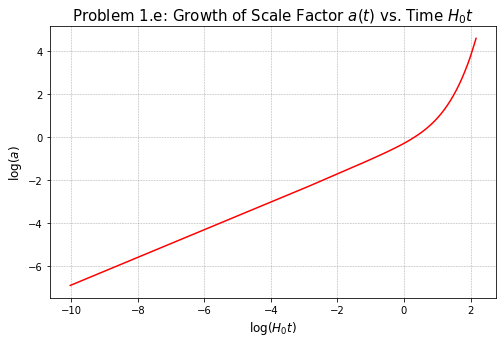

In [7]:
#List of endpoints to evaluate for integral of the age of the universe
stop_list = linspace(0.001, 100, 1000)


#Loop to calculate age of the universe in terms of H0 for specific scale factors a
loga_list = []
H0t_list = []
for stop in stop_list:
    H0t_list.append(log(compute_age(0, stop)*3.171*10**-18))  #[billions of years]
    loga_list.append(log(stop))
    

#Plotting the results
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(H0t_list, loga_list, linestyle = 'solid', color = 'red')
ax.set_xlabel('log($H_0t$)', fontsize = 12)
ax.set_ylabel('log($a$)', fontsize = 12)
ax.set_title('Problem 1.e: Growth of Scale Factor $a(t)$ vs. Time $H_0t$', fontsize = 15)
ax.grid(color = 'darkgray', linewidth = 0.5, linestyle = 'dashed')